In [445]:
import pandas as pd
import numpy as np
import random
import re
import en_core_web_sm
import time
import matplotlib.pyplot as plt

In [373]:
def detect_gender(s):
    return True if s.lower() in {'female', 'male', 'transsexual', 
                                 'trans', 'genderfluid', 'agender',
                                 'bigender', 'polygender', 'androgyne',
                                 'intergender', 'demigender', 'afab', 'amab'} else False

In [374]:
def detect_race(s):
    return True if s.lower() in {'american', 'indian', 'asian', 
                                 'black', 'african', 'white', 
                                 'native hawaiian', 'hawaiian native',
                                 'alaskan native', 'native alaskan', 
                                 'american indian', 'indian american',
                                 'african american', 'pacific islander'} else False

In [375]:
def detect_marital(s):
    return True if s.lower() in {'married', 'widowed', 'divorced', 
                                 'separated', 'single'} else False

In [376]:
def detect_address(s):
    if 'street' in s:
        return True
    nlp = en_core_web_sm.load()
    doc = nlp(' ' + s.capitalize())
    if len(doc.ents) and doc.ents[0].label_=='GPE':
        return True
    else:
        return False
    #for ent in doc.ents: print('Text: ', ent.text, ';\tLabel: ', ent.label_)

In [378]:
def detect_ssn(s):
    return True if re.search('^[0-9]{3}-[0-9]{2}-[0-9]{4}$', s) else False

In [379]:
def detect_ip(s):
    return True if re.search('^[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}$', s) else False

In [380]:
def detect_age(s):
    return True if (s.isdigit() and int(s) < 130) else False

# Logic

In [381]:
def classify(s):
    if s[0].isdigit():
        for func, output in zip([detect_ssn, detect_ip, detect_age], ['SSN', 'IP', 'AGE']):
            if func(s):
                return output
    else:
        for func, output in zip([detect_gender, detect_race, detect_marital, detect_address], 
                                ['GENDER', 'RACE', 'MARITAL', 'ADDRESS']):
            if func(s):
                return output
    return 'NOT DETECTED'

In [365]:
def analyze_column(values, initial_samples=5, max_samples=10):
    range_inds = set(range(0, len(values)))
    samples_inds = random.sample(range_inds, initial_samples)
    for ind in samples_inds:
        range_inds.remove(ind)
    
    predictions = {}
    for key in ['SSN', 'IP', 'AGE', 'GENDER', 'RACE', 'MARITAL', 'ADDRESS', 'NOT DETECTED']:
        predictions[key] = 0
        
    unique_items = set()
    
    for ind in samples_inds:
        item = str(values[ind])
        unique_items.add(item)
        predictions[classify(item)] += 1
        
    total_iterations = initial_samples
    while len(unique_items) < initial_samples and total_iterations < max_samples:
        total_iterations += 1
        ind = random.sample(range_inds, 1)[0]
        range_inds.remove(ind)
        
        item = str(values[ind])
        unique_items.add(item)
        predictions[classify(item)] += 1

    return predictions, total_iterations

In [419]:
def dumb_analyze_column(values):
    predictions = {}
    for key in ['SSN', 'IP', 'AGE', 'GENDER', 'RACE', 'MARITAL', 'ADDRESS', 'NOT DETECTED']:
        predictions[key] = 0
    for item in values:
        predictions[classify(str(item))] += 1
    return predictions, values.shape[0]

In [330]:
analyze_column(df.col1.values)

({'SSN': 0,
  'IP': 0,
  'AGE': 5,
  'GENDER': 0,
  'RACE': 0,
  'MARITAL': 0,
  'ADDRESS': 0,
  'NOT DETECTED': 0},
 5)

In [350]:
analyze_column(df['Marital Status'].values)

{'married', 'single'}


({'SSN': 0,
  'IP': 0,
  'AGE': 0,
  'GENDER': 0,
  'RACE': 0,
  'MARITAL': 10,
  'ADDRESS': 0,
  'NOT DETECTED': 0},
 10)

In [364]:
analyze_column(df['col_noise'].values)

{'119', '116', '72', '98', 'QWERTY'}


({'SSN': 0,
  'IP': 0,
  'AGE': 4,
  'GENDER': 0,
  'RACE': 0,
  'MARITAL': 0,
  'ADDRESS': 0,
  'NOT DETECTED': 5},
 9)

In [459]:
def process_table(df, useDumb):
    iterations_list = []
    for col in df.columns:
        print('Currently processing column: ', col)
        if useDumb:
            predictions, total_iterations = dumb_analyze_column(df[col].values)
        else:
            predictions, total_iterations = analyze_column(df[col].values)
        iterations_list.append(total_iterations)
    return predictions, iterations_list

In [463]:
def perform_everything(data_location, number_of_observations=50):
    df = pd.read_csv(data_location);
    
    print('\nNOT DUMB SECTION\n')
    start = time.time()
    predictions_not_dumb, iters_not_dumb = process_table(df, useDumb=False)
    end = time.time()
    time_not_dumb = end - start
    
    print('\nDUMB SECTION\n')
    start = time.time()
    predictions_dumb, iters_dumb = process_table(df[:number_of_observations], useDumb=True)
    end = time.time()
    time_dumb = end - start
    
    print('\nSUMMARY SECTION\n')
    print('Approx. time for not dumb method: ', time_not_dumb)
    print('Approx. time for dumb method: ', len(df) / number_of_observations * time_dumb)
    print('Time ratio: ', len(df) / number_of_observations * time_dumb / time_not_dumb)
    
    plt.hist(iters_not_dumb);
    plt.xlabel('Number of samples taken')
    plt.ylabel('Count');
    plt.show()

# Santander data (test_ver2.csv)


NOT DUMB SECTION

Currently processing column:  fecha_dato
Currently processing column:  ncodpers
Currently processing column:  ind_empleado
Currently processing column:  pais_residencia
Currently processing column:  sexo
Currently processing column:  age
Currently processing column:  fecha_alta
Currently processing column:  ind_nuevo
Currently processing column:  antiguedad
Currently processing column:  indrel
Currently processing column:  ult_fec_cli_1t
Currently processing column:  indrel_1mes
Currently processing column:  tiprel_1mes
Currently processing column:  indresi
Currently processing column:  indext
Currently processing column:  conyuemp
Currently processing column:  canal_entrada
Currently processing column:  indfall
Currently processing column:  tipodom
Currently processing column:  cod_prov
Currently processing column:  nomprov
Currently processing column:  ind_actividad_cliente
Currently processing column:  renta
Currently processing column:  segmento

DUMB SECTION

Cu

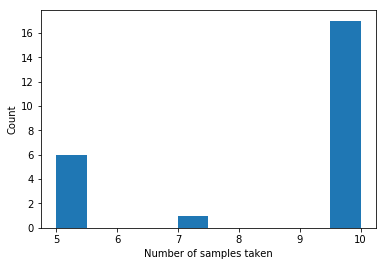

In [461]:
perform_everything(data_location='data/test_ver2.csv')

# Mortgage data (hmda_lar.csv)


NOT DUMB SECTION

Currently processing column:  Unnamed: 0
Currently processing column:  tract_to_msamd_income
Currently processing column:  rate_spread
Currently processing column:  population
Currently processing column:  minority_population
Currently processing column:  number_of_owner_occupied_units
Currently processing column:  number_of_1_to_4_family_units
Currently processing column:  loan_amount_000s
Currently processing column:  hud_median_family_income
Currently processing column:  applicant_income_000s
Currently processing column:  state_name
Currently processing column:  state_abbr
Currently processing column:  respondent_id
Currently processing column:  purchaser_type_name
Currently processing column:  property_type_name
Currently processing column:  preapproval_name
Currently processing column:  owner_occupancy_name
Currently processing column:  msamd_name
Currently processing column:  loan_type_name
Currently processing column:  loan_purpose_name
Currently processing co

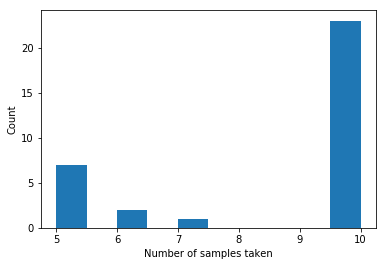

In [462]:
perform_everything(data_location='data/cleaned_mortgage.csv')

# Debugging

In [287]:
df = pd.DataFrame({'col1' : np.random.randint(0, 120, 20), 'Marital Status' : ['single', 'married']*10})
df

,col1,Marital Status
0,97,single
1,28,married
2,119,single
3,43,married
4,105,single
5,57,married
6,4,single
7,38,married
8,52,single
9,45,married


In [336]:
df['col_noise'] = df['col1']

In [362]:
df.loc[range(1,14), 'col_noise'] = 'QWERTY'

In [363]:
df

,col1,Marital Status,col_noise
0,97,single,97
1,28,married,QWERTY
2,119,single,QWERTY
3,43,married,QWERTY
4,105,single,QWERTY
5,57,married,QWERTY
6,4,single,QWERTY
7,38,married,QWERTY
8,52,single,QWERTY
9,45,married,QWERTY


In [ ]:
# Measure time on 100 rows and then extrapolate to 15 (or 1) millions

In [409]:
for s in ['111.44.1.255', 'george washington street', '111-22-3333', 'single', 'qwerty', '45', '999', 'Asian']:
    print(classify(s))

IP
ADDRESS
SSN
MARITAL
NOT DETECTED
AGE
NOT DETECTED
RACE
